# What this file does

Gathers Fall FTE (full time equivalent numbers) for CT's 12 Community Colleges from 1980-2018. Data is continuous from 1984 onwards.

# Getting the data 

Sources: https://nces.ed.gov/ipeds/datacenter/InstitutionByName.aspx?stepId=1 and https://www.ct.edu/. There are 12 2-year community colleges in CT, and 4 state colleges + Charter Oak which is wholly online. 

This federal data runs from 1980-2018. 2018 is supposed to be a provisional release, but you shouldn't expect there to be too many changes to that data according to the head of the IPEDs data center. I'm looking at the Full-Time Total numbers from their Fall Enrollment Surveys. If needed, I can refine this analysis by race/gender.

# Tools

In [40]:
import pandas as pd

# Data cleaning + analysis

In [41]:
#read in the data

In [42]:
df = pd.read_csv('community_colleges.csv')

In [43]:
#check that you have all 12 colleges

In [44]:
df

,UnitID,Institution Name,Full time total (EF2017_RV All students total),Full time total (EF2016_RV All students total),Full time total (EF2015_RV All students total),Full time total (EF2014_RV All students total),Full time total (EF2013_RV All students total),Full time total (EF2012_RV All students total),Full time total (EF2011_RV All students total),Full time total (EF2010_RV All students total),...,Full time total (EF1991 All students total),Full time total (EF1990 All students total),Full time total (EF1989 All students total),Full time total (EF1988 All students total),Full time total (EF1987 All students total),Full time total (EF1986 All students total),Full time total (EF1985NW All students total),Full time total (EF1984NW All students total),Full time total (EF1980 All students total),Unnamed: 38
0,128577,Asnuntuck Community College,676,652,622,690,703,650,650,688,...,298,236,222,195,186,180,169,181,249,NaN
1,129367,Capital Community College,690,688,825,971,993,1052,1179,1317,...,489,438,472,424,453,507,551,687,756,NaN
2,130396,Gateway Community College,2179,2081,2286,2589,2689,2612,2490,2553,...,961,813,704,623,586,598,627,666,823,NaN
3,129543,Housatonic Community College,1729,1767,1654,1694,1843,2056,2242,2348,...,443,465,422,426,419,427,467,551,830,NaN
4,129695,Manchester Community College,1969,2169,2383,2517,2712,2721,2819,3213,...,1922,2025,1818,1623,1545,1524,1642,1792,1793,NaN
5,129756,Middlesex Community College,996,976,1087,1162,1089,1088,1099,1186,...,851,826,831,702,608,678,722,777,1201,NaN
6,129729,Naugatuck Valley Community College,2173,2231,2362,2370,2603,2647,2764,2951,...,1406,1473,1421,1271,1121,1190,1281,1225,1564,NaN
7,130040,Northwestern Connecticut Community College,375,419,434,423,457,464,511,548,...,480,472,459,408,362,422,414,474,521,NaN
8,130004,Norwalk Community College,2054,1978,2134,2258,2180,2267,2375,2531,...,773,669,720,633,674,652,733,819,1028,NaN
9,130217,Quinebaug Valley Community College,505,524,587,671,677,691,663,783,...,281,306,303,272,283,301,317,255,132,NaN


In [45]:
#wide to long

In [46]:
new_df = df.melt(id_vars=['Institution Name', 'UnitID'])

In [47]:
new_df

,Institution Name,UnitID,variable,value
0,Asnuntuck Community College,128577,Full time total (EF2017_RV All students total),676.0
1,Capital Community College,129367,Full time total (EF2017_RV All students total),690.0
2,Gateway Community College,130396,Full time total (EF2017_RV All students total),2179.0
3,Housatonic Community College,129543,Full time total (EF2017_RV All students total),1729.0
4,Manchester Community College,129695,Full time total (EF2017_RV All students total),1969.0
...,...,...,...,...
439,Northwestern Connecticut Community College,130040,Unnamed: 38,NaN
440,Norwalk Community College,130004,Unnamed: 38,NaN
441,Quinebaug Valley Community College,130217,Unnamed: 38,NaN
442,Three Rivers Community College,129808,Unnamed: 38,NaN


In [48]:
#create year column

In [49]:
new_df['Year'] = new_df.variable.str.extract(r'.*EF(\d\d\d\d)').astype(float)

In [50]:
new_df

,Institution Name,UnitID,variable,value,Year
0,Asnuntuck Community College,128577,Full time total (EF2017_RV All students total),676.0,2017.0
1,Capital Community College,129367,Full time total (EF2017_RV All students total),690.0,2017.0
2,Gateway Community College,130396,Full time total (EF2017_RV All students total),2179.0,2017.0
3,Housatonic Community College,129543,Full time total (EF2017_RV All students total),1729.0,2017.0
4,Manchester Community College,129695,Full time total (EF2017_RV All students total),1969.0,2017.0
...,...,...,...,...,...
439,Northwestern Connecticut Community College,130040,Unnamed: 38,NaN,NaN
440,Norwalk Community College,130004,Unnamed: 38,NaN,NaN
441,Quinebaug Valley Community College,130217,Unnamed: 38,NaN,NaN
442,Three Rivers Community College,129808,Unnamed: 38,NaN,NaN


In [53]:
#1980-2018

In [54]:
new_df['Year'].unique()

array([2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       2018., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1980.,
         nan])

# Final form for viz

In [55]:
#sum across years, convert series to dataframe, rename columns

In [56]:
df_final = pd.DataFrame(new_df.groupby(by='Year').value.sum()).rename(columns={
    'Year':'year',
    'value':'FTE'
}).reset_index()

In [57]:
df_final['Year'] = df_final['Year'].astype(int)

# Fall FTE numbers across all 12 colleges

<AxesSubplot:xlabel='Year'>

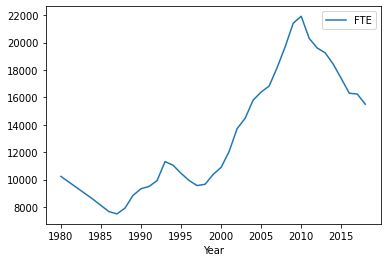

In [58]:
df_final.plot(x='Year', y='FTE')

# % change in FTE across all 12 colleges

In [59]:
#calculate % change

In [60]:
df_final['pct_change'] = df_final.FTE.pct_change()

In [61]:
df_final['pct_change'] = df_final['pct_change']*100

In [62]:
df_final

,Year,FTE,pct_change
0,1980,10228.0,NaN
1,1984,8563.0,-16.278842
2,1985,8106.0,-5.336915
3,1986,7658.0,-5.526770
4,1987,7490.0,-2.193784
5,1988,7913.0,5.647530
6,1989,8842.0,11.740174
7,1990,9330.0,5.519113
8,1991,9495.0,1.768489
9,1992,9914.0,4.412849


<AxesSubplot:xlabel='Year'>

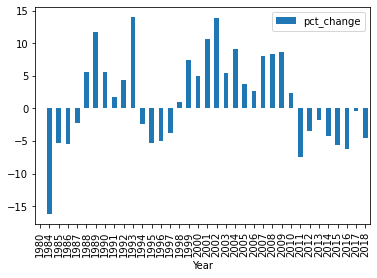

In [63]:
df_final.plot(x='Year', y='pct_change', kind='bar')